<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

Метод ближайших соседей (k Nearest Neighbors, или kNN) — тоже очень популярный метод классификации, также иногда используемый в задачах регрессии. Это, наравне с деревом решений, один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей, какие преобладают, таков и ты. Формально основой метода является гипотезой компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных.

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

Вычислить расстояние до каждого из объектов обучающей выборки
Отобрать k объектов обучающей выборки, расстояние до которых минимально
Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди 
k ближайших соседей

Метод ближайших соседей – хорошо изученный подход (в машинном обучении, эконометрике и статистике больше известно наверно только про линейную регрессию). Для метода ближайших соседей существует немало важных теорем, утверждающих, что на "бесконечных" выборках это оптимальный метод классификации. Специалисты часто считают kNN теоретически идеальным алгоритмом, применимость которого просто ограничена вычислительными возможностями и проклятием размерностей.

Качество классификации методом ближайших соседей зависит от нескольких параметров:

- число соседей
- метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Победы" с диапазоном значений до 1000  не вносил больший вклад в расстояние, чем "Атака" со значениями до 100.
- веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")


Основные параметры класса sklearn.neighbors.KNeighborsClassifier:

- weights: "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция
- algorithm (опционально): "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем - расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.
- leaf_size (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей
- metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие

Главная задача обучаемых алгоритмов – их способность обобщаться, то есть хорошо работать на новых данных. Поскольку, на новых данных мы сразу не можем проверить качество построенной модели (нам ведь надо для них сделать прогноз, то есть истинных значений целевого признака мы для них не знаем), то надо пожертвовать небольшой порцией данных, чтоб на ней проверить качество модели.

Чаще всего это делается одним из 2 способов:

- отложенная выборка (held-out/hold-out set). При таком подходе мы оставляем какую-то долю обучающей выборки (как правило от 20% до 40%), обучаем модель на остальных данных (60-80% исходной выборки) и считаем некоторую метрику качества модели (например, самое простое – долю правильных ответов в задаче классификации) на отложенной выборке.

- кросс-валидация (cross-validation) кросс-валидация

Модель обучается на разных  подвыборках исходной выборки , а проверяется на одной подвыборке (каждый раз на разной). Получаются 
 оценки качества модели, которые обычно усредняются, выдавая среднюю оценку качества классификации/регресии на кросс-валидации.

Кросс-валидация дает лучшую по сравнению отложенной выборкой оценку качества модели на новых данных. Но кросс-валидация вычислительно сложнее на больших данных.

Кросс-валидация – очень важная техника в машинном обучении (применяемая также в статистике и эконометрике), с ее помощью выбираются гиперпараметры моделей, сравниваются модели между собой, оценивается полезность новых признаков в задаче и т.д.

# Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics     

In [ ]:
lol = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
lol.head(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [ ]:
X=lol.iloc[:,2:]

y=lol['blueWins']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=42) # random_state - для воспроизводимости

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (6915, 38), y_train shape: (6915,),
X_test shape: (2964, 38), y_test shape: (2964,)


In [ ]:
# функция оценки модели

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 

        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    # Confusion Matrix
    metrics.ConfusionMatrixDisplay.from_estimator(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    metrics.RocCurveDisplay.from_estimator(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)
        
    
def split_scale(df, target, scaler=StandardScaler()):
   
    
    
    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    # Get list of column names
    cols = X_train.columns
    
    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
    
    return X_train, X_test, y_train, y_test


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):

    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

# Классификация с количеством соседей = 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)
knn_predictions

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6842105263157895


# Классификация с количеством соседей = 15

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7456    0.7492    0.7474      3469
           1     0.7463    0.7426    0.7444      3446

    accuracy                         0.7459      6915
   macro avg     0.7459    0.7459    0.7459      6915
weighted avg     0.7459    0.7459    0.7459      6915

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7030    0.7372    0.7197      1480
           1     0.7245    0.6894    0.7065      1484

    accuracy                         0.7132      2964
   macro avg     0.7137    0.7133    0.7131      2964
weighted avg     0.7137    0.7132    0.7131      2964

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


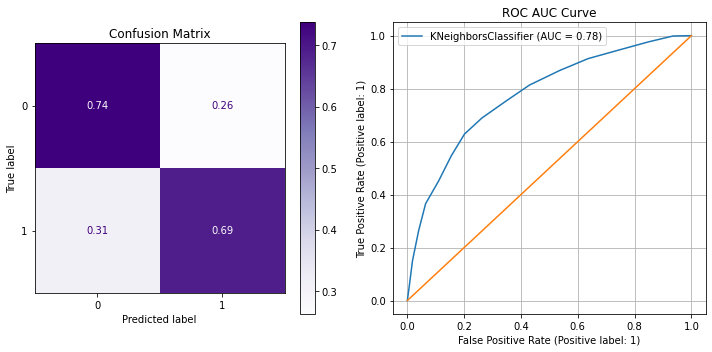

KNeighborsClassifier(n_neighbors=15)

In [ ]:
fit_eval(KNeighborsClassifier(n_neighbors=15), \
                      X_train, y_train, \
                      X_test, y_test)

# Масштабирование признаков

Масштабирование признаков посредством стандартизации, также называемое нормализацией Z-оценки, является важным этапом предварительной обработки для многих алгоритмов машинного обучения. Он включает в себя изменение масштаба каждой функции таким образом, чтобы стандартное отклонение равнялось 1, а среднее значение равнялось 0.

Даже если древовидные модели (почти) не подвержены масштабированию, многие другие алгоритмы требуют нормализации признаков, часто по разным причинам: чтобы упростить сходимость (например, логистическая регрессия без штрафов), чтобы создать по другому обученную модель. п



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(X_train)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7438    0.7541    0.7489      3469
           1     0.7490    0.7385    0.7437      3446

    accuracy                         0.7463      6915
   macro avg     0.7464    0.7463    0.7463      6915
weighted avg     0.7464    0.7463    0.7463      6915

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7108    0.7507    0.7302      1480
           1     0.7366    0.6954    0.7154      1484

    accuracy                         0.7230      2964
   macro avg     0.7237    0.7230    0.7228      2964
weighted avg     0.7237    0.7230    0.7228      2964

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


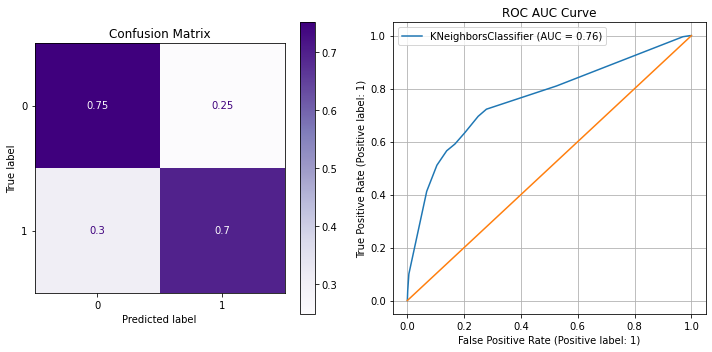

KNeighborsClassifier(n_neighbors=15)

In [ ]:
fit_eval(KNeighborsClassifier(n_neighbors=15), \
                      scaled_X_train, y_train, \
                      X_test, y_test)

# Визуализация работы алгоритма с масштабирорванием и без него

Чтобы визуализировать границу решения KNeighborsClassifier, в этом разделе  выбираем подмножество из двух признаков, которые имеют значения разного порядка.

Здесь граница решения показывает, что обучение на масштабированных или немасштабированных данных приводит к  разным моделям. Причина в том, что переменная «blueKills» имеет значения от 0 до 22; тогда как переменная «redTotalGold» варьируется от 11212 до 22732. Из-за этого на расстояния между образцами в основном влияют различия в значениях «redTotalGold», в то время как значения «blueKills» будут сравнительно малы. Если использовать StandardScaler для нормализации этой базы данных, оба масштабированных значения лежат примерно в одном промежутке, и обе переменные будут более или менее одинаково влиять на модель.

In [ ]:
lX[["blueKills", "redTotalGold"]].describe()

,blueKills,redTotalGold
count,9879.000000,9879.000000
mean,6.183925,16489.041401
std,3.011028,1490.888406
min,0.000000,11212.000000
25%,4.000000,15427.500000
50%,6.000000,16378.000000
75%,8.000000,17418.500000
max,22.000000,22732.000000


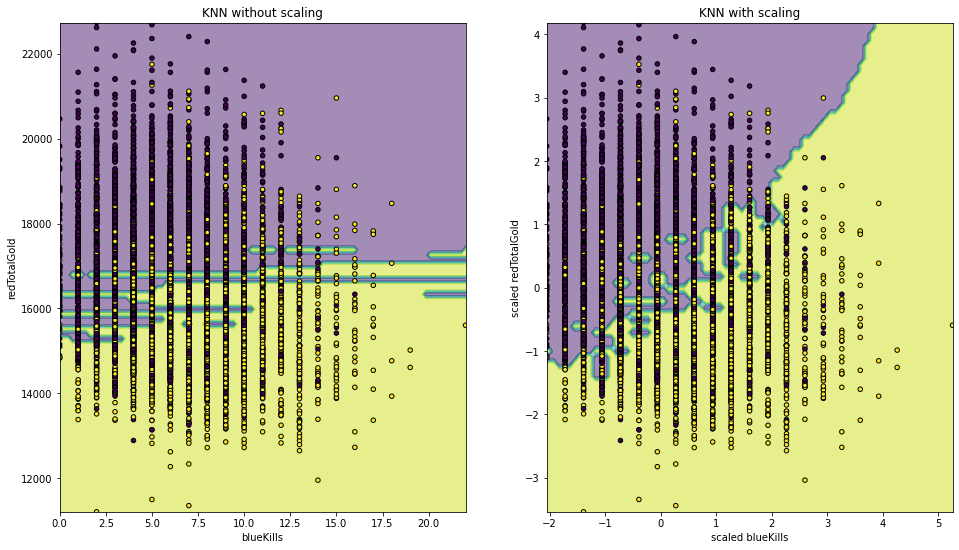

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier


X_plot = X[["blueKills", "redTotalGold"]]
X_plot_scaled = scaler.fit_transform(X_plot)
clf = KNeighborsClassifier(n_neighbors=18)


def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["blueKills"], X_plot["redTotalGold"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["blueKills"].min(), X_plot["blueKills"].max()))
    disp.ax_.set_ylim((X_plot["redTotalGold"].min(), X_plot["redTotalGold"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 9))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled blueKills")
ax2.set_ylabel("scaled redTotalGold")
_ = ax2.set_title("KNN with scaling")

Уменьшение размерности с использованием PCA. Метод анализа главных компонент (PCA – principal component analysis)  состоит в поиске признаков, которые максимизируют дисперсию. Если одна функция изменяется больше, чем другие, только из-за их соответствующих масштабов, PCA определит, что такая функция доминирует.


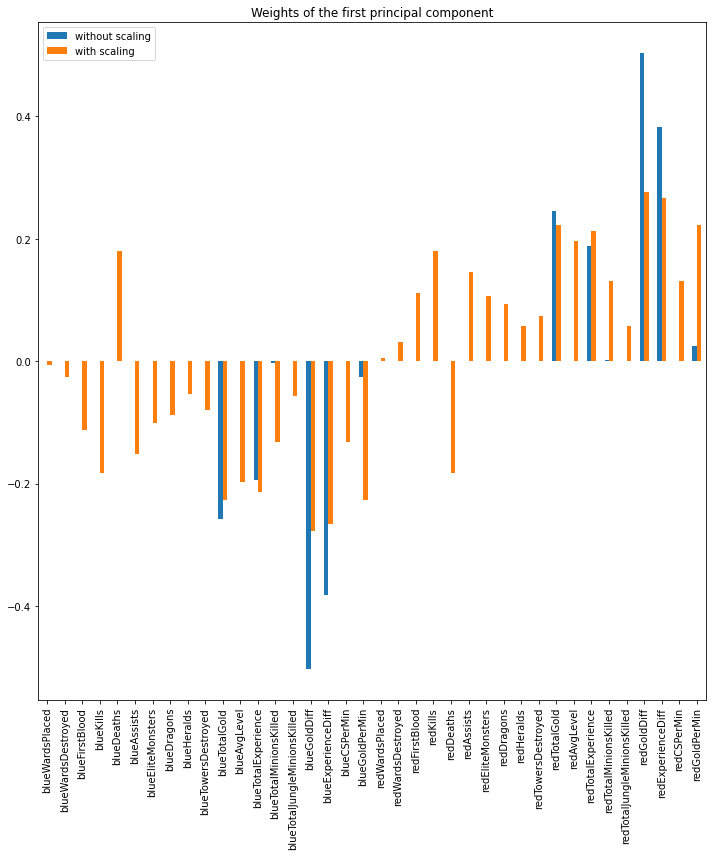

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(10, 12)
)

_ = plt.tight_layout()

Действительно мы видим, что при масщтабировании методом главных компонент значения наших переменных выровнялись и некоторые из них, ранее незначительные увеличили свой вес.

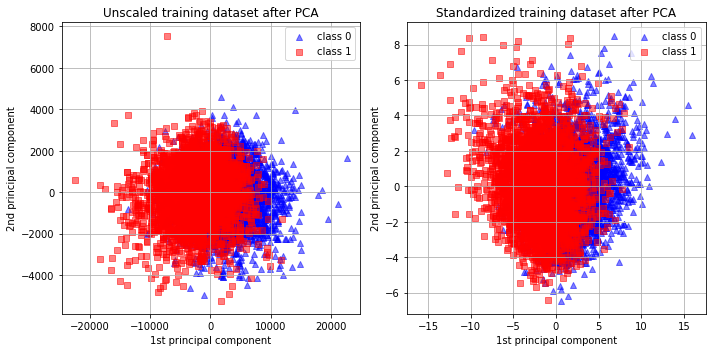

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

target_classes = range(0, 2)
colors = ("blue", "red")
markers = ("^", "s")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()

Разделение после применения РСА позволяет говорить о немного лучшем разделении классов данных. Покажем работу этого алгоритма дополнительно на k-ближайших соседей и  логистической регрессии.

In [ ]:
from sklearn.pipeline import make_pipeline


unscaled_clf = make_pipeline(pca, clf)
unscaled_clf.fit(X_train, y_train)

scaled_clf = make_pipeline(scaler, pca, clf)
scaled_clf.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=18))])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = unscaled_clf.predict(X_test)
y_pred_scaled = scaled_clf.predict(X_test)
y_proba = unscaled_clf.predict_proba(X_test)
y_proba_scaled = scaled_clf.predict_proba(X_test)

print("Test accuracy for the unscaled PCA")
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print("Test accuracy for the standardized data with PCA")
print(f"{accuracy_score(y_test, y_pred_scaled):.2%}\n")
print("Log-loss for the unscaled PCA")
print(f"{log_loss(y_test, y_proba):.3}\n")
print("Log-loss for the standardized data with PCA")
print(f"{log_loss(y_test, y_proba_scaled):.3}")

Test accuracy for the unscaled PCA
72.13%

Test accuracy for the standardized data with PCA
71.46%

Log-loss for the unscaled PCA
2.68

Log-loss for the standardized data with PCA
0.673


Применение масштабирования РСА не оказало положительного влияния на подуктивность k-ближайших соседей

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV

Cs = np.logspace(-5, 5, 20)

unscaled_clf = make_pipeline(pca, LogisticRegressionCV(Cs=Cs))
unscaled_clf.fit(X_train, y_train)

scaled_clf = make_pipeline(scaler, pca, LogisticRegressionCV(Cs=Cs))
scaled_clf.fit(X_train, y_train)

print(f"Optimal C for the unscaled PCA: {unscaled_clf[-1].C_[0]:.4f}\n")
print(f"Optimal C for the standardized data with PCA: {scaled_clf[-1].C_[0]:.2f}")

Optimal C for the unscaled PCA: 0.0000

Optimal C for the standardized data with PCA: 0.05


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = unscaled_clf.predict(X_test)
y_pred_scaled = scaled_clf.predict(X_test)
y_proba = unscaled_clf.predict_proba(X_test)
y_proba_scaled = scaled_clf.predict_proba(X_test)

print("Test accuracy for the unscaled PCA")
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print("Test accuracy for the standardized data with PCA")
print(f"{accuracy_score(y_test, y_pred_scaled):.2%}\n")
print("Log-loss for the unscaled PCA")
print(f"{log_loss(y_test, y_proba):.3}\n")
print("Log-loss for the standardized data with PCA")
print(f"{log_loss(y_test, y_proba_scaled):.3}")

Test accuracy for the unscaled PCA
72.17%

Test accuracy for the standardized data with PCA
72.64%

Log-loss for the unscaled PCA
0.546

Log-loss for the standardized data with PCA
0.531


Напротив на логистической регрессии РСА позволил улучшить продуктивность.

# Задание
на собранном ранее наборе данных (он может быть дополнен или собран новый)

- определить цель исследования
- разделить набор данных на тренировочный и тестовый 
- использовать классификацию методом k-ближайших соседей
- описать ход исследования дав пояснение и обоснование
- сделать выводы и определить практическое значение полученных знаний